In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
%matplotlib inline

import os
os.chdir("D:\Divy\Projects\Team projects\Hackathon\Lets hack 4.0\RUL-and-SOH-estimation-of-Lithium-ion-satellite-power-systems-using-support-vector-regression-master")

from mat2json import loadMat
from util import getBatteryCapacity, getChargingValues, getDischargingValues, getDataframe, series_to_supervised, rollingAverage

In [2]:
def get_file_path():
    pathlist = []
    for e in os.listdir(os.path.join("data", "raw")):
        path = os.path.join("data", "raw", e)
        for a in os.listdir(path):
            if ".mat" in a:
                pathlist.append(os.path.join(path, a))
    return pathlist

In [3]:
pathList = get_file_path()
len(pathList)

34

In [4]:
jsonList = {}
keyList = []
for e in pathList:
    key, value = loadMat(e)
    if key in keyList:
        key = key+"_"
    keyList.append(key)
    jsonList[key] = value

data\raw\BatteryAgingARC_25-44\B0025.mat
data\raw\BatteryAgingARC_25-44\B0026.mat
data\raw\BatteryAgingARC_25-44\B0027.mat
data\raw\BatteryAgingARC_25-44\B0028.mat
data\raw\BatteryAgingARC_25-44\B0029.mat
data\raw\BatteryAgingARC_25-44\B0030.mat
data\raw\BatteryAgingARC_25-44\B0031.mat
data\raw\BatteryAgingARC_25-44\B0032.mat
data\raw\BatteryAgingARC_25-44\B0033.mat
data\raw\BatteryAgingARC_25-44\B0034.mat
data\raw\BatteryAgingARC_25-44\B0036.mat
data\raw\BatteryAgingARC_25-44\B0038.mat
data\raw\BatteryAgingARC_25-44\B0039.mat
data\raw\BatteryAgingARC_25-44\B0040.mat
data\raw\BatteryAgingARC_25-44\B0041.mat
data\raw\BatteryAgingARC_25-44\B0042.mat
data\raw\BatteryAgingARC_25-44\B0043.mat
data\raw\BatteryAgingARC_25-44\B0044.mat
data\raw\BatteryAgingARC_25_26_27_28_P1\B0025.mat
data\raw\BatteryAgingARC_25_26_27_28_P1\B0026.mat
data\raw\BatteryAgingARC_25_26_27_28_P1\B0027.mat
data\raw\BatteryAgingARC_25_26_27_28_P1\B0028.mat
data\raw\BatteryAgingARC_45_46_47_48\B0045.mat
data\raw\Batter

In [5]:
batteryCapacity = {}
for e in jsonList.keys():
    try:
#         if "_" in e:
#             e = e.replace("_","")
        batteryCapacity[e] = getBatteryCapacity(jsonList[e])
    except:
        print(e)

B0050
B0052


In [6]:
keys = batteryCapacity.keys()
keys

dict_keys(['B0025', 'B0026', 'B0027', 'B0028', 'B0029', 'B0030', 'B0031', 'B0032', 'B0033', 'B0034', 'B0036', 'B0038', 'B0039', 'B0040', 'B0041', 'B0042', 'B0043', 'B0044', 'B0025_', 'B0026_', 'B0027_', 'B0028_', 'B0045', 'B0046', 'B0047', 'B0048', 'B0049', 'B0051', 'B0053', 'B0054', 'B0055', 'B0056'])

In [7]:
Values = {}
Dataframe = {}
for e in batteryCapacity.keys():
#     if "_" in e:
#         ev = e.replace("_","")
#     else:
#         ev = e
    try:
#         print(e)
        Dataframe[e] = getDataframe(jsonList[e])
    except:
        print(e)
    for i in range(len(jsonList[e])):
        if jsonList[e][i]['cycle'] == "charge":
#             print(f"{e}-{i}")
            Values[f"{e}-{i}"] = getChargingValues(jsonList[e],i)
        elif jsonList[e][i]['cycle'] == "discharge":
            Values[f"{e}-{i}"] = getDischargingValues(jsonList[e],i)

B0053
B0054


In [8]:
len(Values)

4465

In [9]:
len(Dataframe)

30

In [10]:
# 1.4 Ahr minimum battery threshold

In [11]:
d4c4 = ['B0055','B0056','B0045','B0046','B0047','B0048','B0041','B0042','B0043','B0044']
d4SC = ['B0049','B0051']
d24 = ['B0025','B0026','B0027','B0028']
d43 = ['B0029','B0030','B0031','B0032']
d24c6 = ['B0033','B0034','B0036']
d2444c6 = ['B0038','B0039','B0040']

main_dict = {'d4c4' : {'list':d4c4}, 'd4SC' : {'list':d4SC}, 'd24' : {'list':d24}, 'd43' : {'list':d43}, 'd24c6' : {'list':d24c6}, 'd2444c6' : {'list':d2444c6}}

BatteryAgingARC_25_26_27_28_P1 = ['B0025_','B0026_','B0027_','B0028_']
Battery_25_28 = ['B0025','B0026','B0027','B0028']
Battery_29_32 = ['B0029','B0030','B0031','B0032']
Battery_33_36 = ['B0033','B0034','B0036']
Battery_38_40 = ['B0038','B0039','B0040']
Battery_41_44 = ['B0041','B0042','B0043','B0044']
BatteryAgingARC_45_46_47_48 = ['B0045','B0046','B0047','B0048']
BatteryAgingARC_49_50_51_52 = ['B0049','B0051']
BatteryAgingARC_53_54_55_56 = ['B0055','B0056']

main_dict_folder = {'BatteryAgingARC_25_26_27_28_P1' : {'list' : BatteryAgingARC_25_26_27_28_P1}, 'Battery_25_28' : {'list' : Battery_25_28}, 'Battery_29_32' : {'list':Battery_29_32}, 'Battery_33_36' : {'list':Battery_33_36}, 'Battery_38_40' : {'list':Battery_38_40}, 'Battery_41_44' : {'list':Battery_41_44}, 'BatteryAgingARC_45_46_47_48' : {'list':BatteryAgingARC_45_46_47_48}, 'BatteryAgingARC_49_50_51_52' : {'list' : BatteryAgingARC_49_50_51_52}, 'BatteryAgingARC_53_54_55_56' : {'list':BatteryAgingARC_53_54_55_56}}

'''
Files till 1.4 Ah(30% fade) 4 deg.C:
B0053.mat	Data for Battery #53
B0054.mat	Data for Battery #54
B0055.mat	Data for Battery #55
B0056.mat	Data for Battery #56
B0045.mat	Data for Battery #45
B0046.mat	Data for Battery #46
B0047.mat	Data for Battery #47
B0048.mat	Data for Battery #48
B0041.mat	Data for Battery #41
B0042.mat	Data for Battery #42
B0043.mat	Data for Battery #43
B0044.mat	Data for Battery #44


Files: 4 deg.C not fully analyzed due to software crash
B0049.mat	Data for Battery #49
B0050.mat	Data for Battery #50
B0051.mat	Data for Battery #51
B0052.mat	Data for Battery #52


Files 24 deg.C:
B0025.mat	Data for Battery #25
B0026.mat	Data for Battery #26
B0027.mat	Data for Battery #27
B0028.mat	Data for Battery #28

B0025.mat	Data for Battery #25
B0026.mat	Data for Battery #26
B0027.mat	Data for Battery #27
B0028.mat	Data for Battery #28


Files 43 deg. C:
B0029.mat	Data for Battery #29
B0030.mat	Data for Battery #30
B0031.mat	Data for Battery #31
B0032.mat	Data for Battery #32


Files till 1.6 Ah(20% fade) 24 deg.C:
B0033.mat	Data for Battery #33
B0034.mat	Data for Battery #34
B0036.mat	Data for Battery #36


Files till 1.6 Ah(20% fade) 24 & 44 deg.C:
B0038.mat	Data for Battery #38
B0039.mat	Data for Battery #39
B0040.mat	Data for Battery #40
'''


'\nFiles till 1.4 Ah(30% fade) 4 deg.C:\nB0053.mat\tData for Battery #53\nB0054.mat\tData for Battery #54\nB0055.mat\tData for Battery #55\nB0056.mat\tData for Battery #56\nB0045.mat\tData for Battery #45\nB0046.mat\tData for Battery #46\nB0047.mat\tData for Battery #47\nB0048.mat\tData for Battery #48\nB0041.mat\tData for Battery #41\nB0042.mat\tData for Battery #42\nB0043.mat\tData for Battery #43\nB0044.mat\tData for Battery #44\n\n\nFiles: 4 deg.C not fully analyzed due to software crash\nB0049.mat\tData for Battery #49\nB0050.mat\tData for Battery #50\nB0051.mat\tData for Battery #51\nB0052.mat\tData for Battery #52\n\n\nFiles 24 deg.C:\nB0025.mat\tData for Battery #25\nB0026.mat\tData for Battery #26\nB0027.mat\tData for Battery #27\nB0028.mat\tData for Battery #28\n\nB0025.mat\tData for Battery #25\nB0026.mat\tData for Battery #26\nB0027.mat\tData for Battery #27\nB0028.mat\tData for Battery #28\n\n\nFiles 43 deg. C:\nB0029.mat\tData for Battery #29\nB0030.mat\tData for Battery 

In [12]:
dk_list = list(Dataframe.keys())
# print(dk_list)
# key = []
# for e in dk_list:
#     if "B0034" in e:
#         key.append(e)
# df_a = Dataframe[key[0]]
# df_a['capacity']

In [13]:
def handle_outliers(X_train, y_train):
    lst_x, lst_y = rollingAverage(X_train, y_train)
    d = {'X_train':X_train.values,'y_train':y_train.values}
    d = pd.DataFrame(d)
    d = d[~d['X_train'].isin(lst_x)]
    X_train = d['X_train']
    y_train = d['y_train']
    return X_train, y_train

In [14]:
# def get_models(df):
#     x = df['cycle']
#     y = df['capacity']
#     X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
#     X_train, y_train = handle_outliers(X_train, y_train)
#     model = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#     X_train = X_train.values.reshape(-1, 1)
#     y_train = y_train.values.reshape(-1, 1)
#     model.fit(X_train, y_train)
#     y_test_pred = model.predict(X_test.values.reshape(-1,1))
#     mse = mean_squared_error(y_test,y_test_pred)
#     dict = {"model" : model, "mse" : mse, "x_test" : X_test.values.reshape(-1,1), "y_test" : y_test}
#     return dict

In [15]:
from xgboost import XGBRegressor
def get_models_xgb(df):
    x = df['cycle']
    y = df['capacity']
#     x = (x - min(x)) / (max(x) - min(x))
#     y = (y - min(y)) / (max(y) - min(y))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
#     print(len(y_train))
#     X_train, y_train = handle_outliers(X_train, y_train)
#     print(len(y_train))
#     print()
#     model = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
    model = XGBRegressor()
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values.reshape(-1, 1)
#     print(X_train.shape)
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test.values.reshape(-1,1))
    mse = mean_squared_error(y_test,y_test_pred)
    dict = {"model" : model, "mse" : mse, "x_test" : X_test.values.reshape(-1,1), "y_test" : y_test}
    return dict

In [38]:
models = {}
d_dk_list = dk_list
for each in d_dk_list:
#     models[each] = get_models(Dataframe[each])
#     models[each] = get_models_xgb(Dataframe[each])
#     models[each] = get_models_NN(Dataframe[each])
#     print(Dataframe[each])
    try:
        models[each] = get_models_rvm(Dataframe[each])
    except:
        print(each)
        d_dk_list.remove(each)
        
mset = 0
for e in d_dk_list:
    mset = mset + models[e]["mse"]
print(f"Avg. mse = {mset/len(d_dk_list)}")
print()
print(models.keys())

B0025
B0027
B0029
B0031
B0033
B0036
B0039
B0041
B0043
B0025_
B0027_
B0045
B0047
B0049
B0055


KeyError: 'B0026'

In [38]:
def plot_graph(model, x_test, y_test, battery_name, mse = ""):
    y_pred = model.predict(x_test)
    plt.plot(x_test, y_test, label="actual")
    plt.plot(x_test, y_pred, label="predicted")
    if mse == "":
        mse = mean_squared_error(y_test, y_pred)
    plt.xlabel("Number of cycles")
    plt.ylabel("Capicity (in Ah)")
    plt.title(f"{battery_name} MSE: {mse}")
    plt.legend()
    plt.savefig(f"{battery_name}.png")
    plt.show()
    return mse

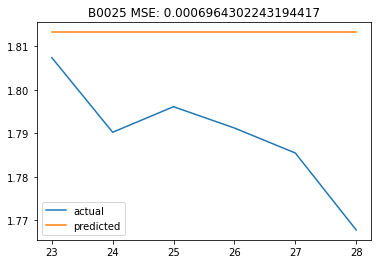

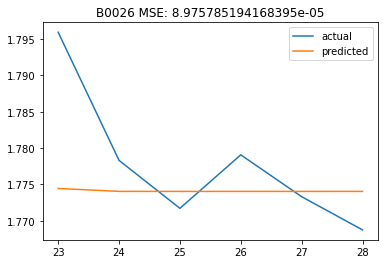

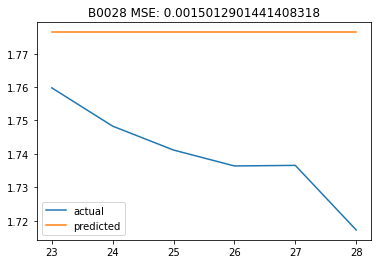

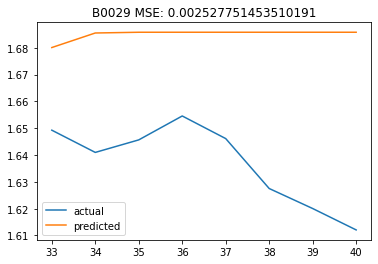

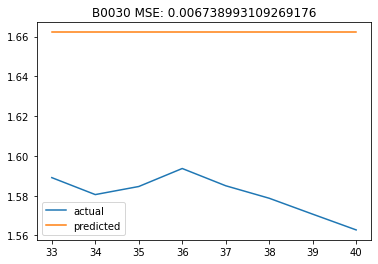

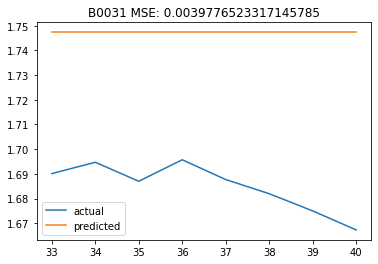

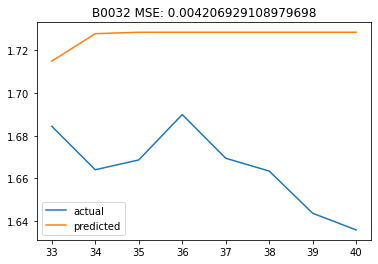

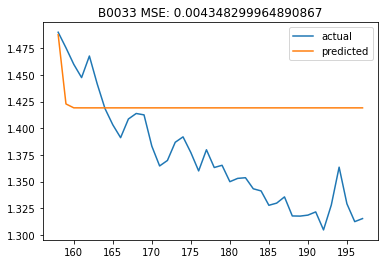

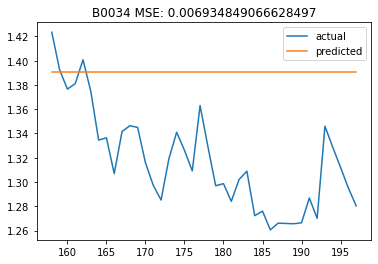

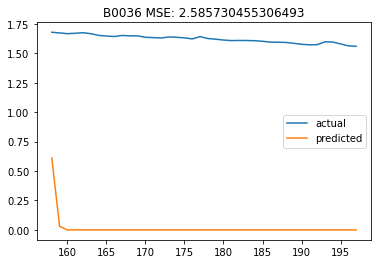

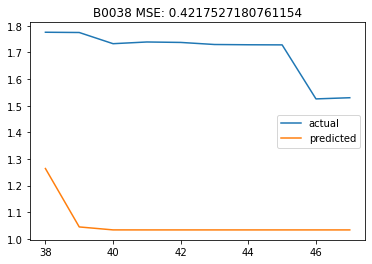

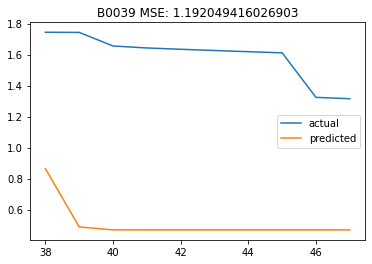

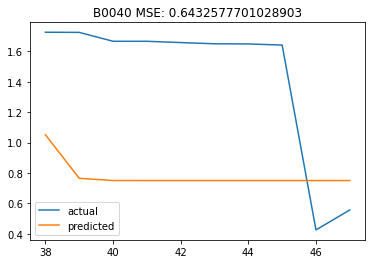

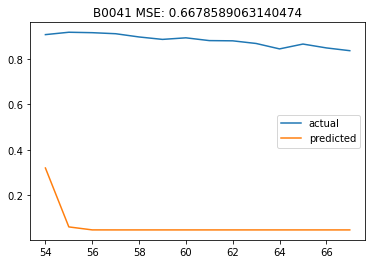

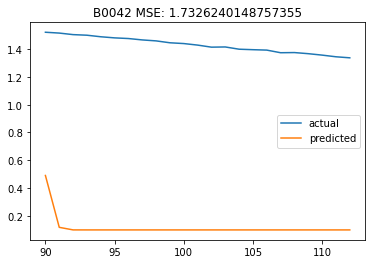

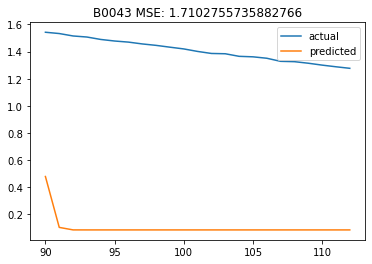

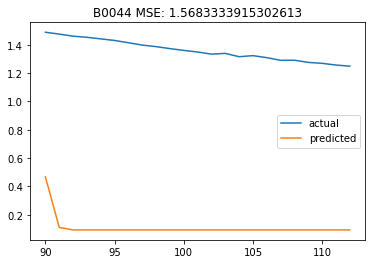

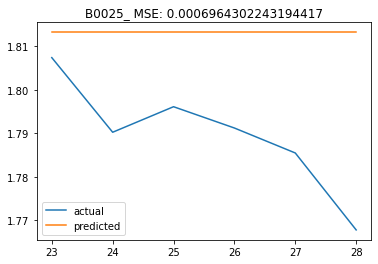

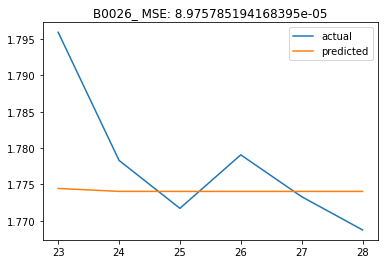

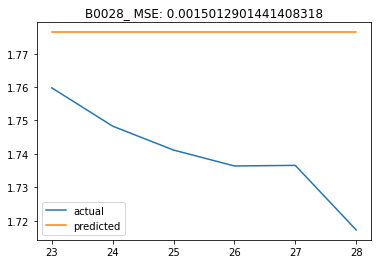

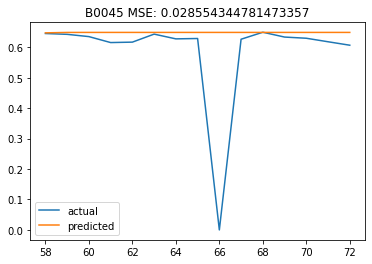

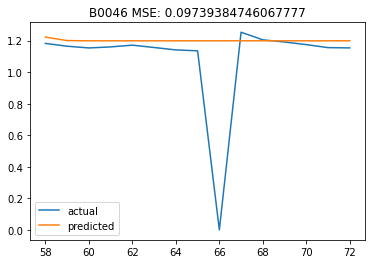

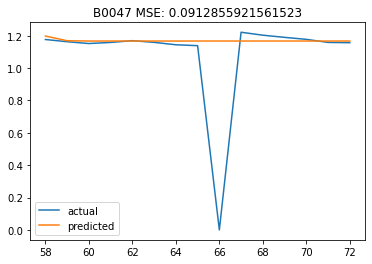

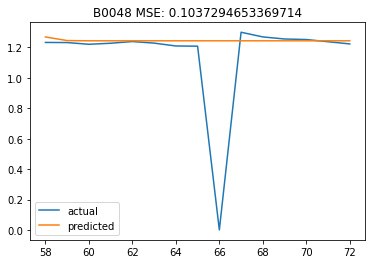

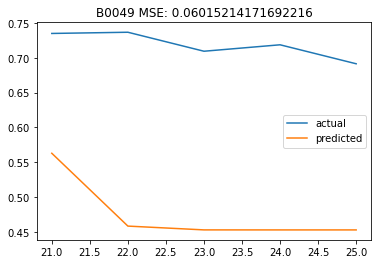

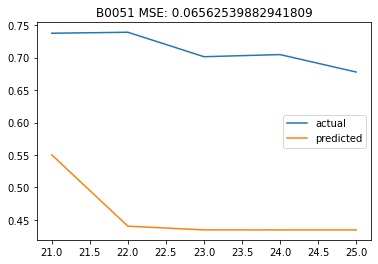

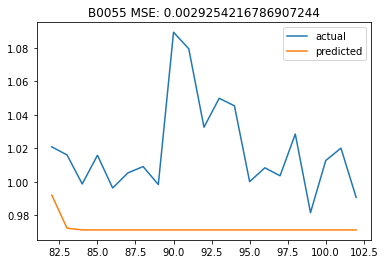

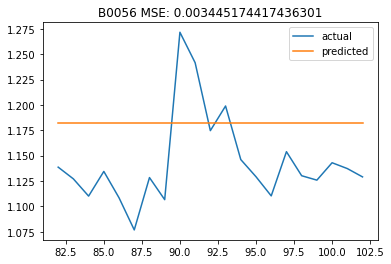

In [43]:
for e in models.keys():
    plot_graph(models[e]["model"], models[e]["x_test"].values.reshape(-1,1), models[e]["y_test"].values, e, models[e]["mse"])

In [179]:
########################################
# Concentate dataframes
# vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

# df = pd.DataFrame()
# for each in dk_list:
#     df = pd.concat([df, Dataframe[each]], axis=0)

In [180]:
# x = df['cycle']
# y = df['capacity']
# x = (x - min(x)) / (max(x) - min(x))
# y = (y - min(y)) / (max(y) - min(y))
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
# #     print(len(y_train))
# # X_train, y_train = handle_outliers(X_train, y_train)
# #     print(len(y_train))
# #     print()
# #     model = SVR(C=20, epsilon=0.0001, gamma=0.00001, cache_size=200,kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
# model = XGBRegressor()
# X_train = X_train.values.reshape(-1, 1)
# y_train = y_train.values.reshape(-1, 1)
# #     print(X_train.shape)
# model.fit(X_train, y_train)
# y_test_pred = model.predict(X_test.values.reshape(-1,1))
# mse = mean_squared_error(y_test,y_test_pred)

In [181]:
# for e in dk_list:
#     df = Dataframe[e]
#     x = df['cycle']
#     y = df['capacity']
#     x = x.values.reshape(-1, 1)
#     y = y.values.reshape(-1, 1)
#     x = (x - min(x)) / (max(x) - min(x))
#     y = (y - min(y)) / (max(y) - min(y))
#     plot_graph(model, x, y, e)

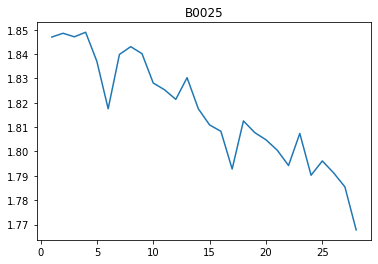

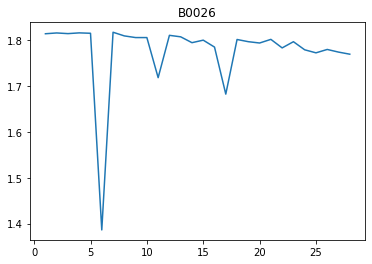

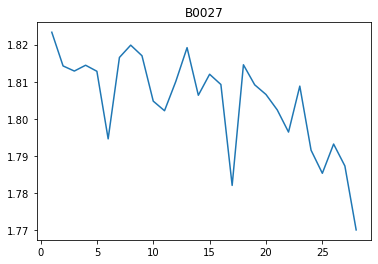

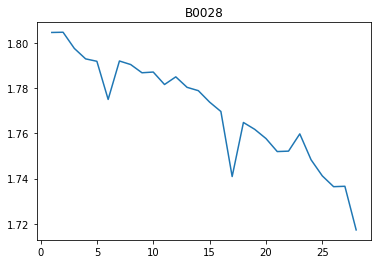

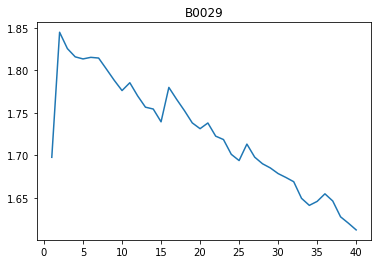

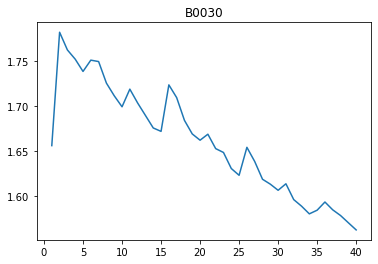

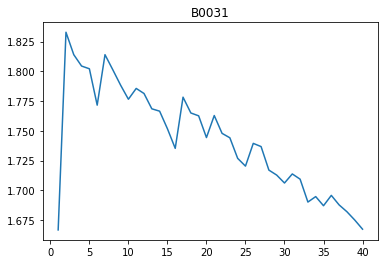

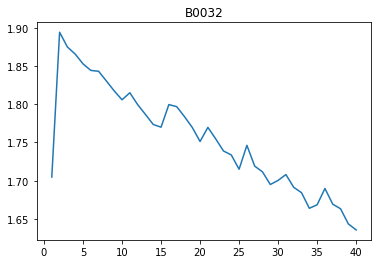

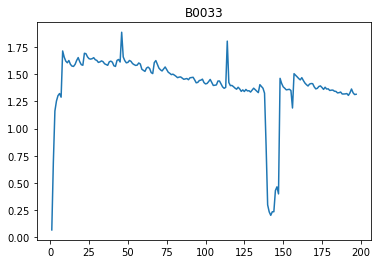

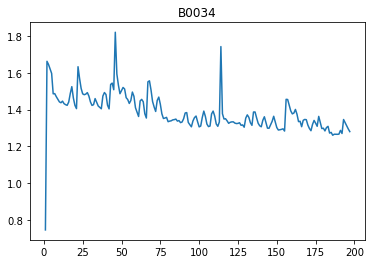

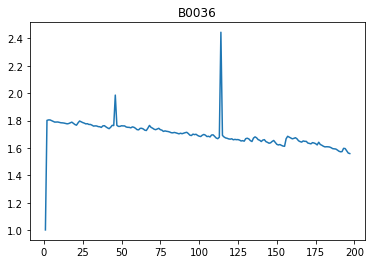

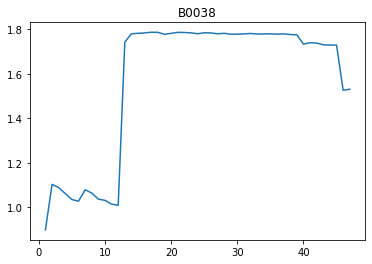

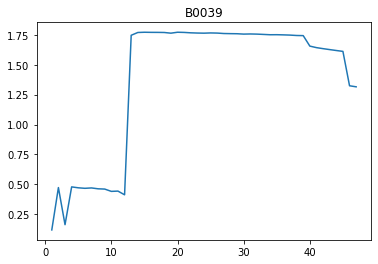

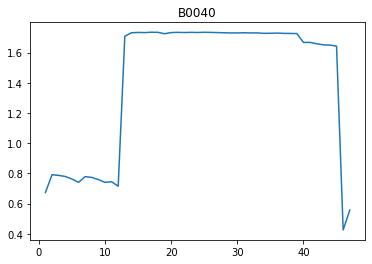

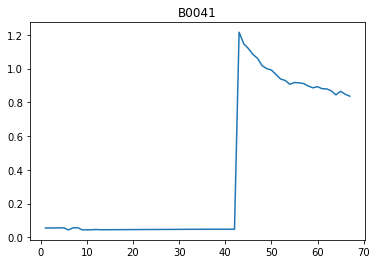

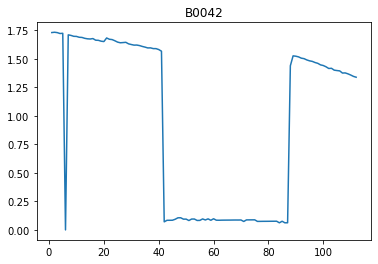

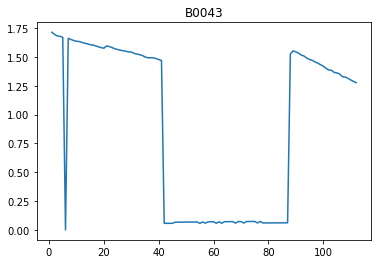

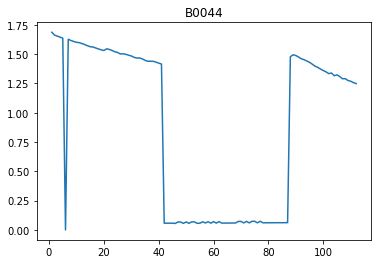

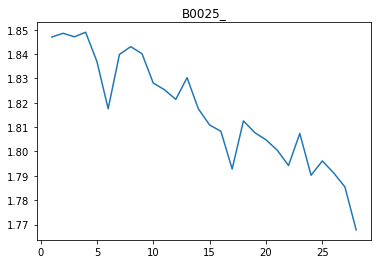

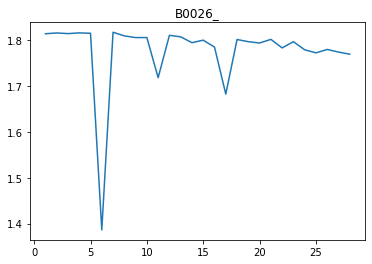

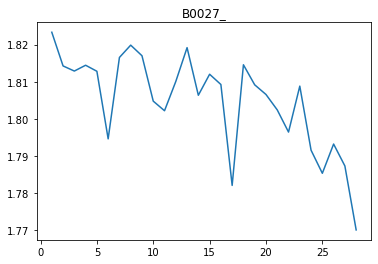

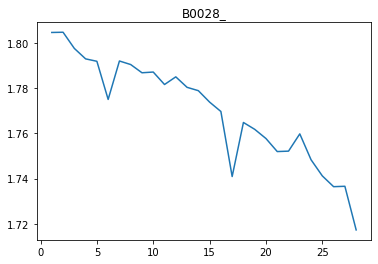

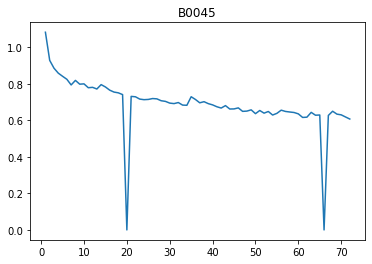

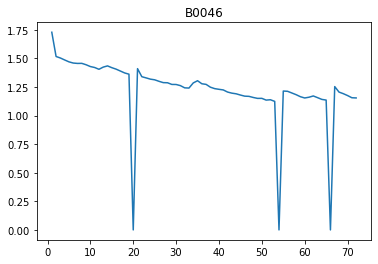

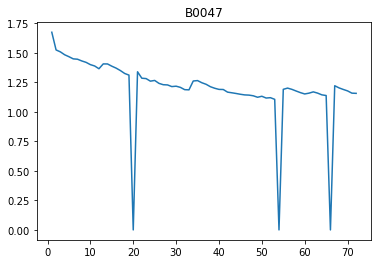

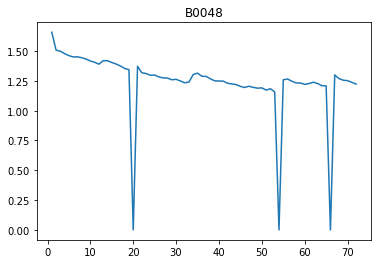

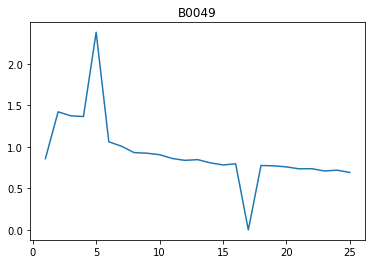

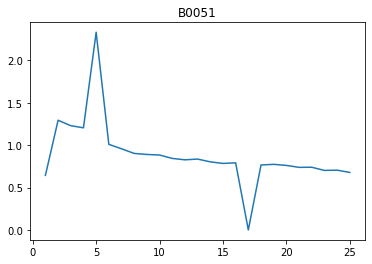

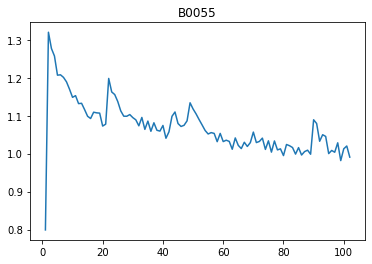

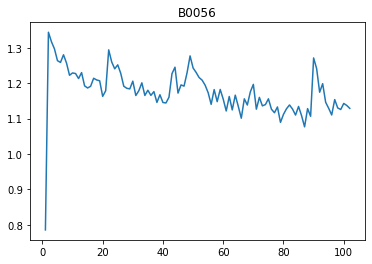

In [64]:
for e in dk_list:
    df = Dataframe[e]
    x = df['cycle'].values.reshape(-1,1)
    y = df['capacity'].values.reshape(-1,1)
#     x = (x - min(x)) / (max(x) - min(x))
#     y = (y - min(y)) / (max(y) - min(y))
    plt.plot(x,y)
    plt.title(e)
    plt.show()

In [41]:
!pip install sklearn-rvm

In [194]:
################################################################################################################################

In [17]:
from sklearn_rvm import EMRVR
def get_models_rvm(df):
    x = df['cycle']
    y = df['capacity']
#     x = (x - min(x)) / (max(x) - min(x))
#     y = (y - min(y)) / (max(y) - min(y))
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
#     print(len(y_train))
#     X_train, y_train = handle_outliers(X_train, y_train)
    X_train = X_train.values.reshape(-1, 1)
    y_train = y_train.values
    model = EMRVR(kernel="rbf")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test.values.reshape(-1, 1))
    mse = mean_squared_error(y_test,y_pred)
    dict = {"model" : model, "mse" : mse, "x_test" : X_test, "y_test" : y_test}
    return dict

In [272]:
#Area wise models

In [18]:
main_dict.keys()

dict_keys(['d4c4', 'd4SC', 'd24', 'd43', 'd24c6', 'd2444c6'])

In [19]:
def concate_df(l):
    df = pd.DataFrame()
    for e in l:
        df = pd.concat([df, Dataframe[e]], axis=0)
    return df

In [20]:
for e in main_dict.keys():
    print(e)
    df = concate_df(main_dict[e]['list'])
#     model = get_models_xgb(df)
    model = get_models_rvm(df)
    model['list'] = main_dict[e]['list']
    main_dict[e] = model

d4c4


D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


KeyboardInterrupt: 

In [ ]:
mse = 0
for e in main_dict.keys():
    l =  main_dict[e]['list']
    model = main_dict[e]['model']
    lmse = 0
    for f in l:
        df = Dataframe[f]
        x = df['cycle'].values.reshape(-1, 1)
        y = df['capacity'].values
#         x = (x - min(x)) / (max(x) - min(x))
#         y = (y - min(y)) / (max(y) - min(y))
        mse = plot_graph(model, x, y, f)
        lmse = lmse + mse
    lmse = lmse/len(l)
    print(lmse)
    mse = mse + lmse
mse = mse/len(main_dict.keys())
print(mse)

In [250]:
#XGBoost 
# 10 deviate
# mse 0.007159767689497097

# not standardization
# mse 0.011600591190259907
# 8-9 deviate
main_dict['d4SC']['list']

['B0049', 'B0051']

In [18]:
#Folder and notepad wise models 

In [21]:
main_dict_folder.keys()

dict_keys(['BatteryAgingARC_25_26_27_28_P1', 'Battery_25_28', 'Battery_29_32', 'Battery_33_36', 'Battery_38_40', 'Battery_41_44', 'BatteryAgingARC_45_46_47_48', 'BatteryAgingARC_49_50_51_52', 'BatteryAgingARC_53_54_55_56'])

In [22]:
def concate_df(l):
    df = pd.DataFrame()
    for e in l:
        df = pd.concat([df, Dataframe[e]], axis=0)
    return df

In [30]:
for e in main_dict_folder.keys():
    print(e)
    df = concate_df(main_dict_folder[e]['list'])
#     model = get_models_xgb(df)
    model = get_models_rvm(df)
    model['list'] = main_dict_folder[e]['list']
    main_dict_folder[e] = model

BatteryAgingARC_25_26_27_28_P1
Battery_25_28
Battery_29_32


D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


Battery_33_36


D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


Battery_38_40


D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


Battery_41_44


D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


BatteryAgingARC_45_46_47_48
BatteryAgingARC_49_50_51_52

D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "



BatteryAgingARC_53_54_55_56


D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "
D:\Divy\Anaconda\lib\site-packages\sklearn_rvm\em_rvm.py:267: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


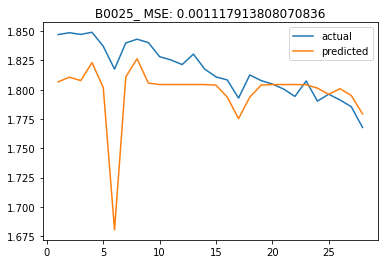

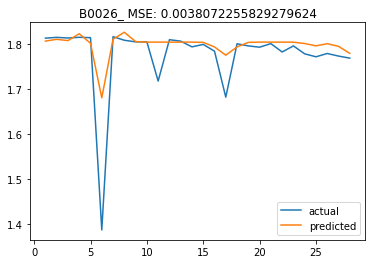

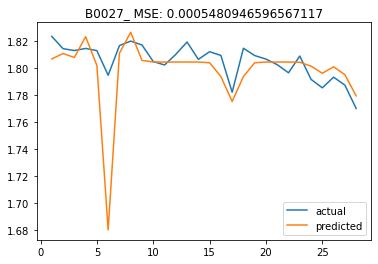

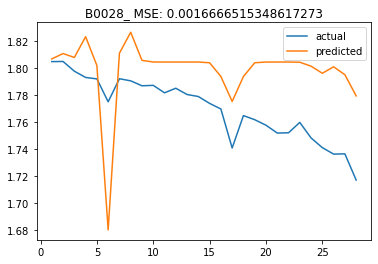

0.0017849713963793094


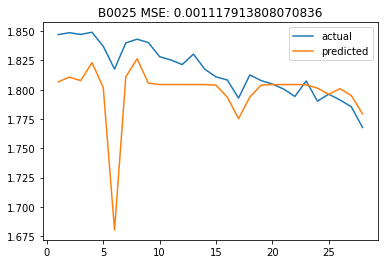

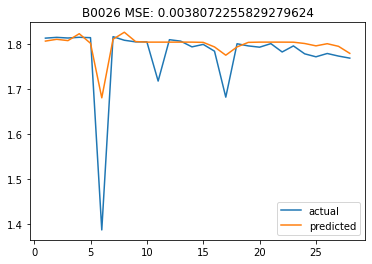

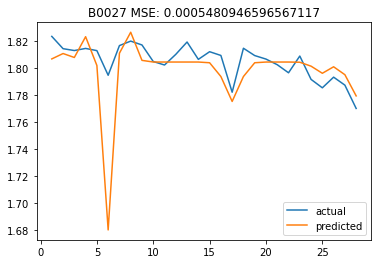

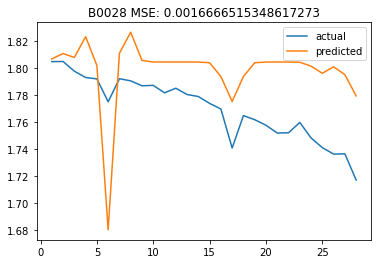

0.0017849713963793094


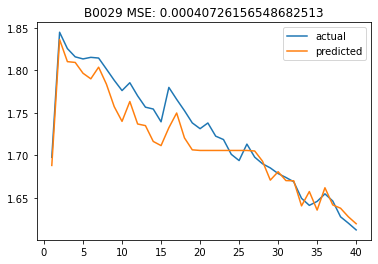

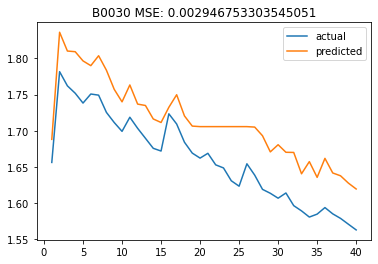

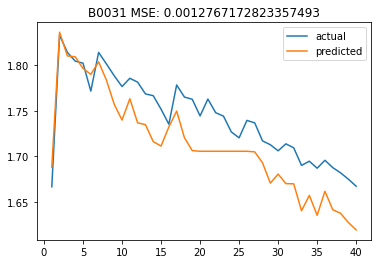

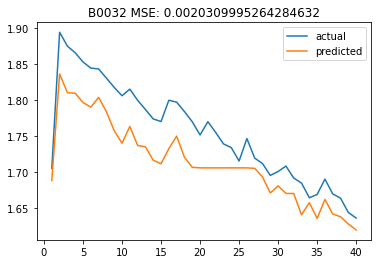

0.0016654329194490222


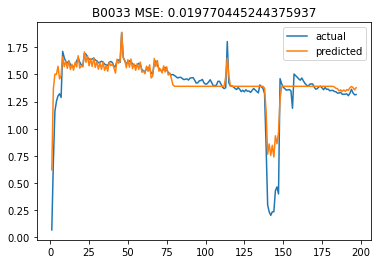

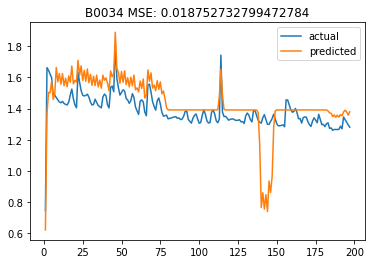

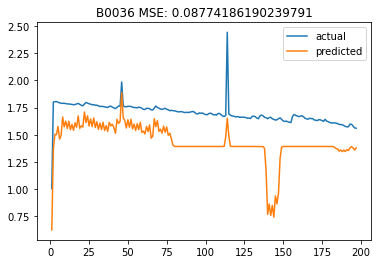

0.04208834664874888


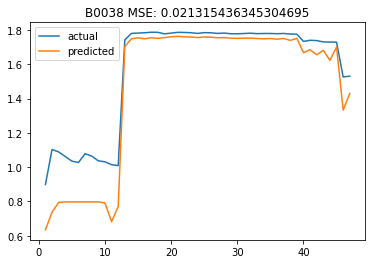

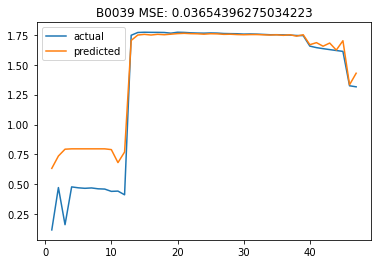

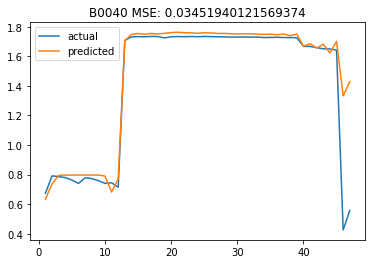

0.03079293343711355


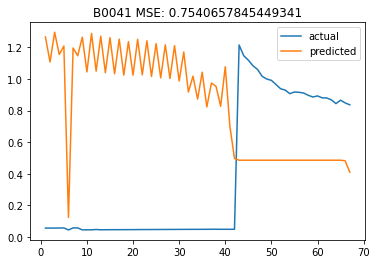

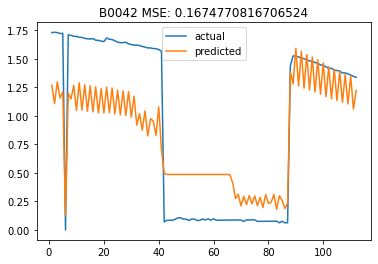

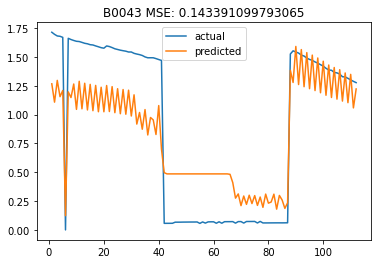

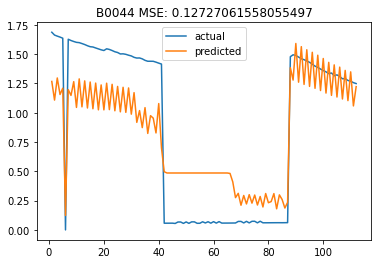

0.2980511453973016


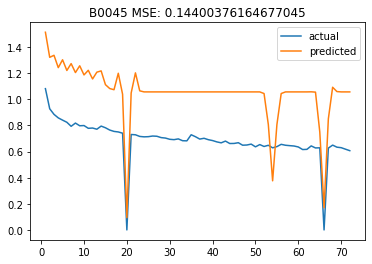

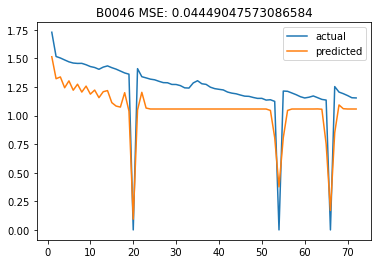

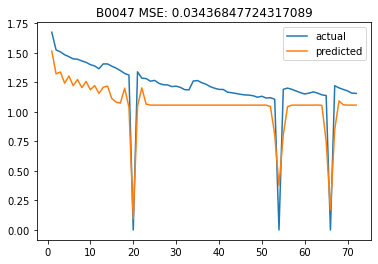

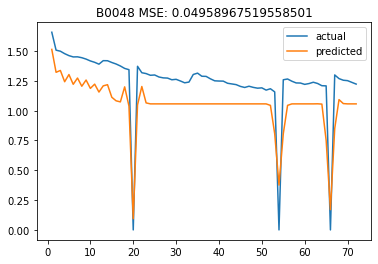

0.06811309745409805


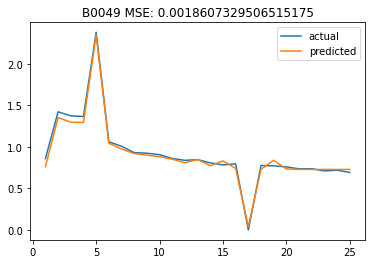

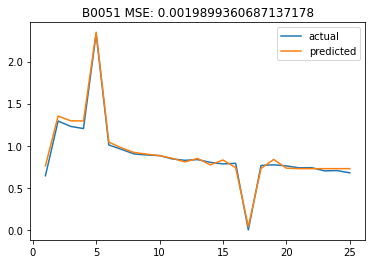

0.0019253345096826176


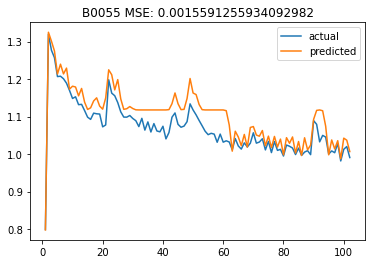

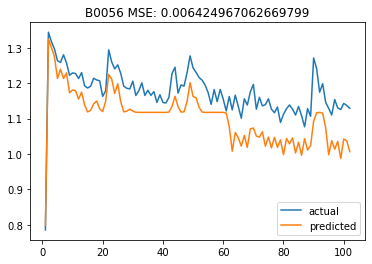

0.003992046328039549
0.0011574459323010387


In [31]:
mse = 0
for e in main_dict_folder.keys():
    l =  main_dict_folder[e]['list']
    model = main_dict_folder[e]['model']
    lmse = 0
    for f in l:
        df = Dataframe[f]
        x = df['cycle'].values.reshape(-1, 1)
        y = df['capacity'].values
#         x = (x - min(x)) / (max(x) - min(x))
#         y = (y - min(y)) / (max(y) - min(y))
        mse = plot_graph(model, x, y, f)
        lmse = lmse + mse
    lmse = lmse/len(l)
    print(lmse)
    mse = mse + lmse
mse = mse/len(main_dict_folder.keys())
print(mse)

In [122]:
 main_dict_folder.keys()

dict_keys(['BatteryAgingARC_25_26_27_28_P1', 'Battery_25_28', 'Battery_29_32', 'Battery_33_36', 'Battery_38_40', 'Battery_41_44', 'BatteryAgingARC_45_46_47_48', 'BatteryAgingARC_49_50_51_52', 'BatteryAgingARC_53_54_55_56'])

In [123]:
len(main_dict_folder.keys())

9

In [32]:
# Import Joblib Module from Scikit Learn

# from sklearn.externals import joblib
from joblib import dump, load
dump(model, 'Model.sav')
# import pickle
pathList = []
for e in list(main_dict_folder.keys()):
    if "models" not in os.listdir():
        os.mkdir("models")
    model = main_dict_folder[e]['model']
    path = os.path.join("models",f"{e}.sav")
    dump( model, path)
#     pickle.dump(model, open(path, 'wb'))
    pathList.append(path)

In [33]:
os.getcwd()

'D:\\Divy\\Projects\\Team projects\\Hackathon\\Lets hack 4.0\\RUL-and-SOH-estimation-of-Lithium-ion-satellite-power-systems-using-support-vector-regression-master'

In [36]:
main_dict_folder_test = dict(main_dict_folder).copy()
for e in pathList:
    key = os.path.basename(e).split(".")[0]
    print(key)
    print(e)
    print()
    main_dict_folder_test[key]["model"] = None
    main_dict_folder_test[key]["model"] = load(e)
#     main_dict_folder_test[key]["model"] = pickle.load(open(path, 'rb'))



BatteryAgingARC_25_26_27_28_P1
models\BatteryAgingARC_25_26_27_28_P1.sav

Battery_25_28
models\Battery_25_28.sav

Battery_29_32
models\Battery_29_32.sav

Battery_33_36
models\Battery_33_36.sav

Battery_38_40
models\Battery_38_40.sav

Battery_41_44
models\Battery_41_44.sav

BatteryAgingARC_45_46_47_48
models\BatteryAgingARC_45_46_47_48.sav

BatteryAgingARC_49_50_51_52
models\BatteryAgingARC_49_50_51_52.sav

BatteryAgingARC_53_54_55_56
models\BatteryAgingARC_53_54_55_56.sav



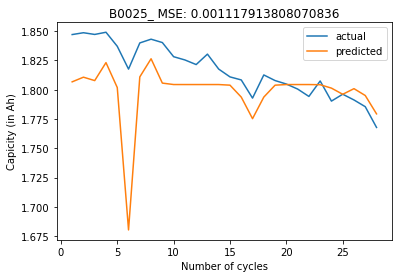

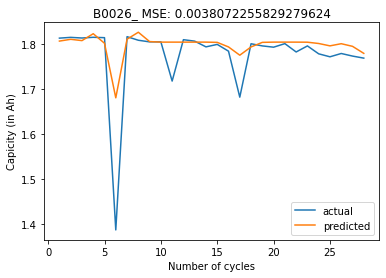

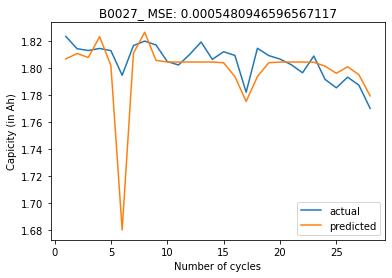

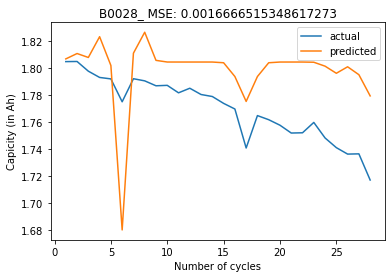

0.0017849713963793094


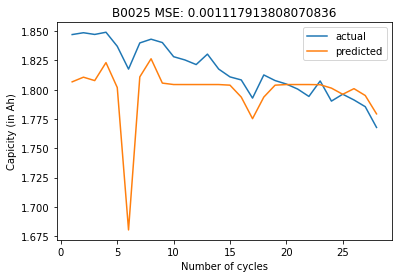

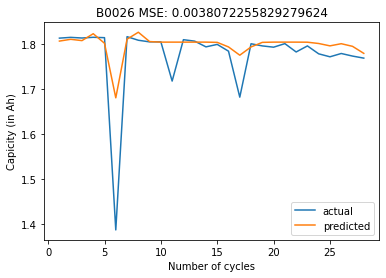

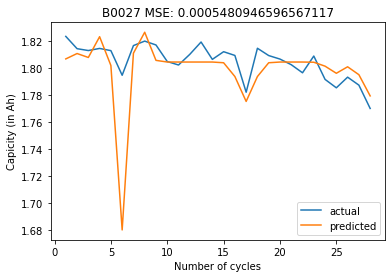

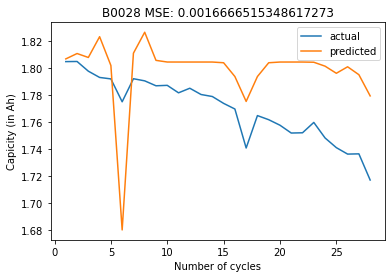

0.0017849713963793094


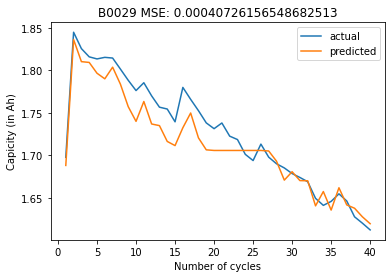

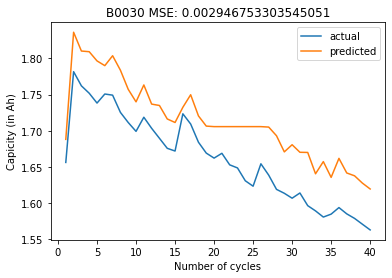

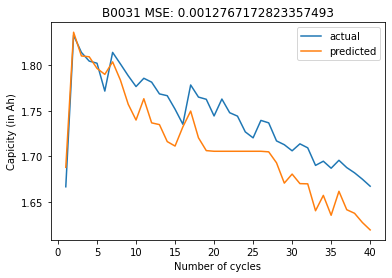

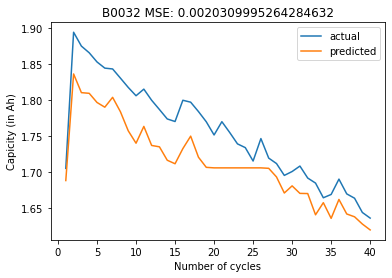

0.0016654329194490222


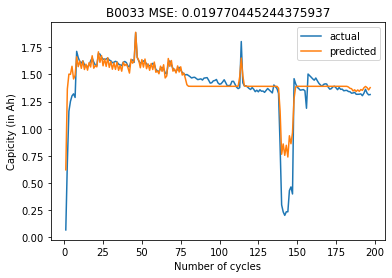

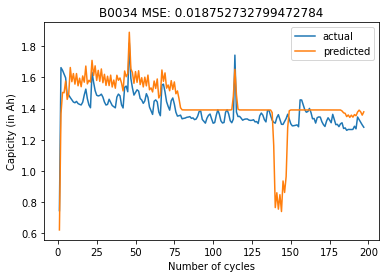

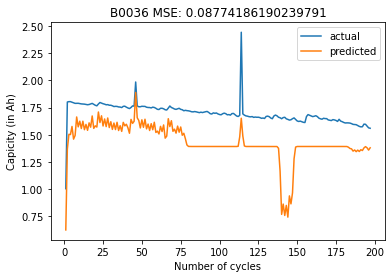

0.04208834664874888


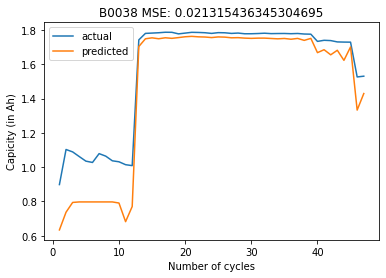

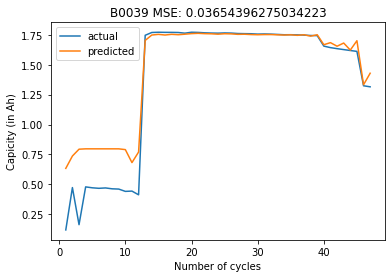

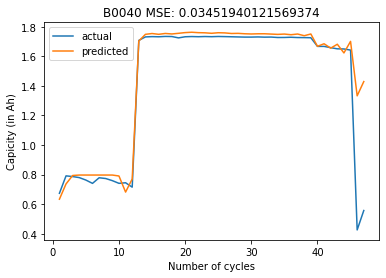

0.03079293343711355


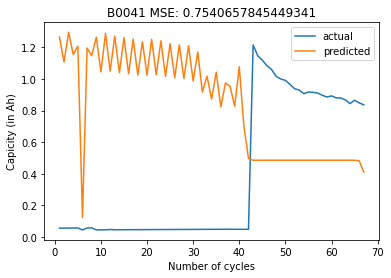

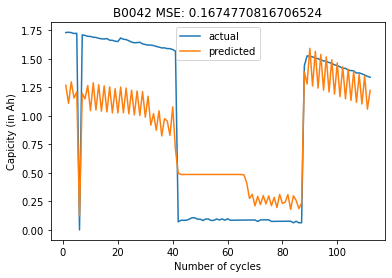

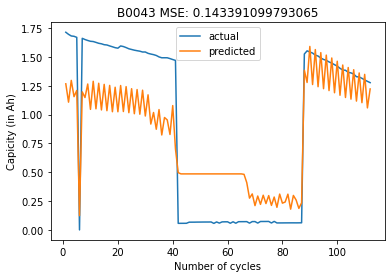

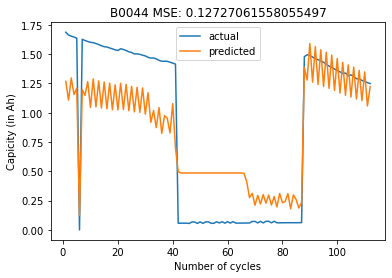

0.2980511453973016


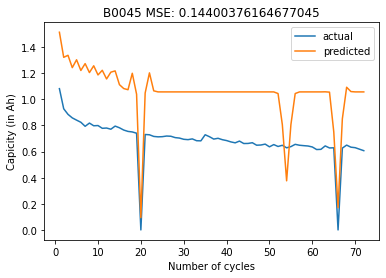

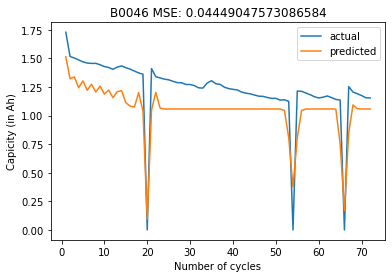

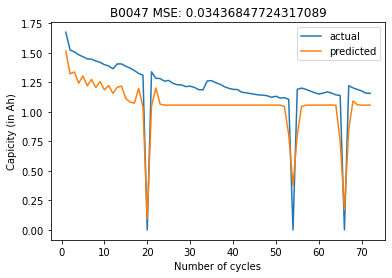

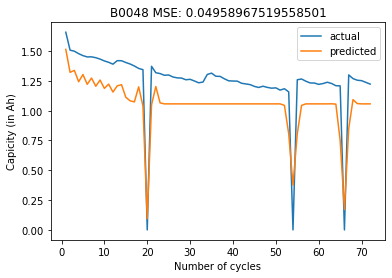

0.06811309745409805


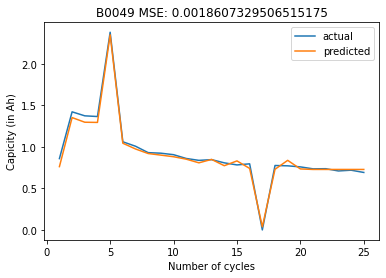

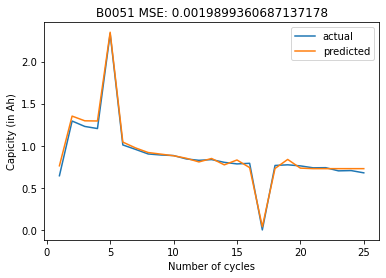

0.0019253345096826176


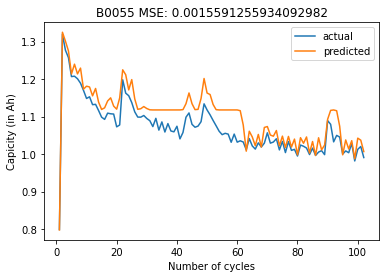

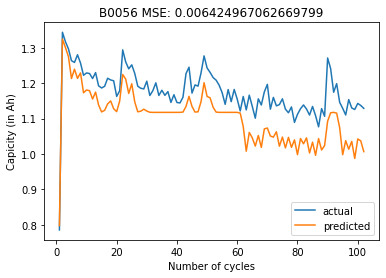

0.003992046328039549
0.0011574459323010387


In [39]:
mse = 0
for e in main_dict_folder_test.keys():
    l =  main_dict_folder_test[e]['list']
    model = main_dict_folder_test[e]['model']
    lmse = 0
    for f in l:
        df = Dataframe[f]
        x = df['cycle'].values.reshape(-1, 1)
        y = df['capacity'].values
#         x = (x - min(x)) / (max(x) - min(x))
#         y = (y - min(y)) / (max(y) - min(y))
        mse = plot_graph(model, x, y, f)
        lmse = lmse + mse
    lmse = lmse/len(l)
    print(lmse)
    mse = mse + lmse
mse = mse/len(main_dict_folder_test.keys())
print(mse)